In [22]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (9.0, 7.0)

# Task 1: Change image channel ordering
Write a function that takes image as an input and change the channel ordering and return a new image. Note that cv2.imread() reads the image with **BGR**, not RGB.


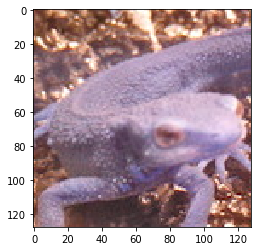

In [2]:
# Original image
img = cv2.imread('imori.jpg')
plt.imshow(img)

In [3]:
type(np.empty_like((2, 2, 2)))

numpy.ndarray

In [4]:
# Define BGR2RGB
def BGR2RGB(img):
    blue = img[:, :, 0].copy()
    green = img[:, :, 1].copy()
    red = img[:, :, 2].copy()

    img[:, :, 0] = red
    img[:, :, 1] = green 
    img[:, :, 2] = blue
    
    return img

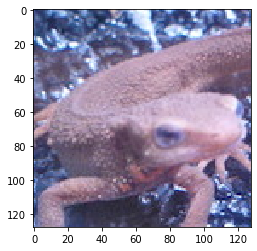

In [5]:
# Show result
plt.imshow(BGR2RGB(img))

# Task 2: Convert color image to grayscale
Write a function that converts color image to grayscale. Formula is given as follows:

Y = 0.2126 R + 0.7152 G + 0.0722 B

In [6]:
def RGB2GRAY(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = 0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]
    return img_gray

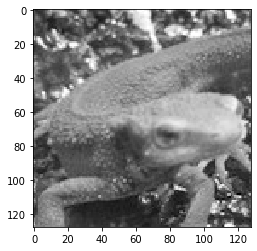

In [7]:
img = cv2.imread('imori.jpg')
img = BGR2RGB(img)
plt.imshow(RGB2GRAY(img), cmap='gray')

# Task 3: Image binarization
Write a function that converts grayscale image to binary (set threshold to 128).

In [8]:
def binarize(img, th):
    img_binary = np.where(img < th, 0, 255)
    return img_binary

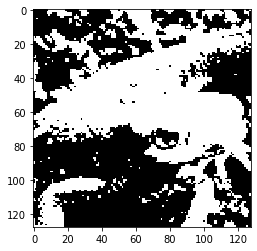

In [9]:
img = cv2.imread('imori.jpg')
img = BGR2RGB(img)
img_gray = RGB2GRAY(img)
img_binary = binarize(img_gray, 128)
plt.imshow(img_binary, cmap="gray")

# Task 4: Otsu thresholding (binarization)
Otsu’s method is an adaptive thresholding way for binarization in image processing. By going through all possible threshold values (from 0 to 255), it can find the optimal threshold value of input image.

## 1. Create histogram for the input image

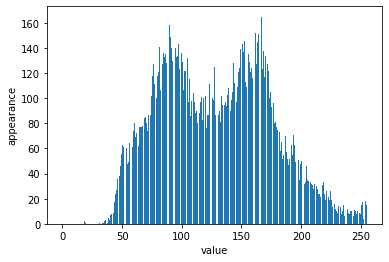

In [10]:
img = cv2.imread('imori.jpg')
img = BGR2RGB(img)
img_gray = RGB2GRAY(img)
plt.hist(img_gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.xlabel('value')
plt.ylabel('appearance')
plt.show()

## 2. Calculate within-class variance & between-class variance


In [11]:
def otsu_binarization(img):
    max_sigma = 0
    max_t = 0
    out = RGB2GRAY(img)
    H, W = out.shape
    
    # determine threshold
    for _t in range(1, 256):
        v0 = out[out < _t]
        m0 = np.mean(v0) if len(v0) > 0 else 0.
        w0 = len(v0) 
        v1 = out[out >= _t]
        m1 = np.mean(v1) if len(v1) > 0 else 0.
        w1 = len(v1) 
        sigma = w0 * w1 * ((m0 - m1) ** 2)
        if sigma > max_sigma:
            max_sigma = sigma
            max_t = _t

    # Binarization
    print("threshold >>", max_t)
    th = max_t
    out[out < th] = 0
    out[out >= th] = 255

    return out

In [12]:
img = cv2.imread('imori.jpg')
thresh = otsu_binarization(img)
print(thresh)

threshold >> 127
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... 255. 255.   0.]
 [  0.   0.   0. ... 255. 255.   0.]
 ...
 [255.   0.   0. ...   0.   0.   0.]
 [255.   0.   0. ...   0.   0.   0.]
 [255. 255.   0. ...   0.   0.   0.]]


## Task 5: HSV transformation
Write a function that takes color image as input and returns new HSV image

In [13]:
def RGB2HSV(_img):
    img = _img.copy() / 255.
    
    hsv = np.zeros_like(img, dtype=np.float32)
    
    max_v = np.max(img, axis=2).copy()
    min_v = np.min(img, axis=2).copy()
    min_arg = np.argmin(img, axis=2)
    
    # Transformation for H
    hsv[..., 0][np.where(max_v == min_v)] = 0
    ind = np.where(min_arg == 0)
    hsv[..., 0][ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
    ## if min == R
    ind = np.where(min_arg == 2)
    hsv[..., 0][ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
    ## if min == G
    ind = np.where(min_arg == 1)
    hsv[..., 0][ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
        
    # S
    hsv[..., 1] = max_v.copy() - min_v.copy()

    # V
    hsv[..., 2] = max_v.copy()
    
    return hsv

# Task 6: Color reduction

In [14]:
def reduce(pix):
    if 0 <= pix < 64:
        return 32
    elif 64 <= pix < 128:
        return 96
    elif 128 <= pix <192:
        return 160
    else:
        return 224

def reduce_color(img):
    return np.vectorize(reduce)(img)

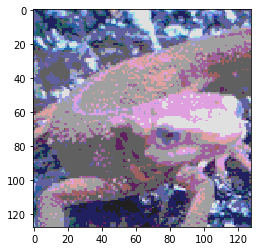

In [15]:
img = cv2.imread('imori.jpg')
img = BGR2RGB(img)
plt.imshow(reduce_color(img))

# Task 7: Average Pooling

In [16]:
def average_pool(img, f=8):
    height, width, channel = img.shape
    n = int(width/f)
    out = np.empty(shape=(n, n, channel))
    
    print(out.shape)
    
    
    for h in range(n):
        for w in range(n):
            for c in range(channel):
                vert_start = h * f
                vert_end = vert_start + f
                horiz_start = w * f
                horiz_end = horiz_start + f
                
                val = np.sum(img[vert_start:vert_end, horiz_start:horiz_end, c]) / f**2
                
                out[h, w, c] = val
    
    return out.astype(np.int32)
                

(16, 16, 3)


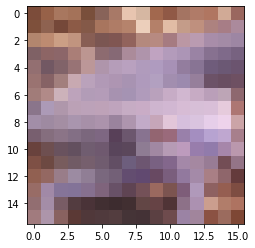

In [17]:
img = cv2.imread('imori.jpg')
# plt.imshow(average_pool(img))
plt.imshow(average_pool(img))

# Task 8: Max Pooling

In [18]:
def max_pool(img, f=8):
    height, width, channel = img.shape
    n = int(width/f)
    out = np.empty(shape=(n, n, channel))
    
    print(out.shape)
    
    
    for h in range(n):
        for w in range(n):
            for c in range(channel):
                vert_start = h * f
                vert_end = vert_start + f
                horiz_start = w * f
                horiz_end = horiz_start + f
                
                val = np.max(img[vert_start:vert_end, horiz_start:horiz_end, c])
                
                out[h, w, c] = val
    
    return out.astype(np.int32)

(16, 16, 3)


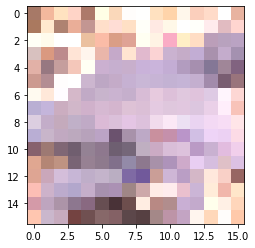

In [19]:
img = cv2.imread('imori.jpg')
plt.imshow(max_pool(img))

# Task 9: Gaussian Filter

In [43]:
def gaussian_filter(img, size=3, sigma=1.3):
    height, width, channel = img.shape
    
    # padding
    pad = size//2
    img_pad = img.copy()
    img_pad = np.pad(img_pad, [(pad, pad), (pad, pad), (0, 0)], 'constant', constant_values=(0,0))
    
    # PREPARE KERNEL
    K = np.zeros(shape=(size, size), dtype=np.float32)
    for x in range(-pad, -pad+size):
        for y in range(-pad, -pad+size):
            K[y+pad, x+pad] = (1/((2 * np.pi * sigma * sigma)) * np.exp(-(x**2+y**2) / (2*(sigma**2))))
    K /= K.sum()
    
    tmp = img_pad.copy()
    
    for h in range(height):
        for w in range(width):
            for c in range(channel):
                tmp[h+pad, w+pad, c] = np.sum(K*img_pad[h:h+size,  w:w+size, c])
    
    tmp = tmp[pad:pad+height, pad:pad+width, :].astype(np.int32)
                
    return tmp
                

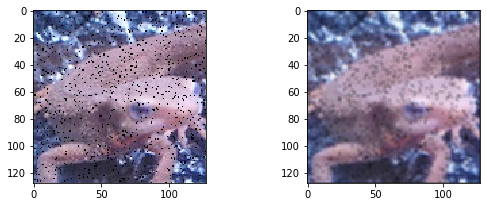

In [44]:
img = cv2.imread('imori_noise.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.imshow(img)
ax2.imshow(gaussian_filter(img))

# Task 10: Median Filter

In [38]:
def median_filter(img, size=3):
    height, width, channel = img.shape
    out = img.copy()
    
    # padding 
    pad = size//2
    out = img.copy()
    out = np.pad(out, [(pad, pad), (pad, pad), (0, 0)], 'constant', constant_values=(0,0))
    
    assert out.shape == (img.shape[0]+2*pad, img.shape[1]+2*pad, img.shape[2])
    
    # Apply filter
    tmp = out.copy()
    
    for h in range(height):
        for w in range(width):
            for c in range(channel):
                out[h+pad, w+pad, c] = np.median(tmp[h:h+size, w:w+size, c])
    
    out = out[pad:H, pad:W, :].astype(np.uint8)
    
    return out
    
    

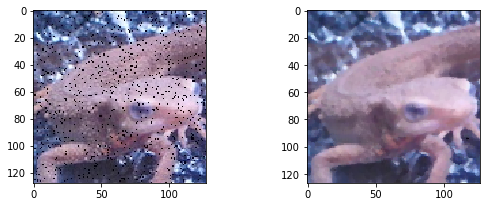

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.imshow(img)
ax2.imshow(median_filter(img))